In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

### Order Google S2T output

In [2]:
example1_time = np.array([5, 6, 7, 8])
example1_sent = np.array(["Hello", "Hello, how are you ?", " how are you", " how are you my friend ?"])

In [3]:
matrix_content = np.zeros((len(example1_sent), len(example1_sent)))

for i, i_sent in enumerate(example1_sent):
    for j, j_sent in enumerate(example1_sent):
        matrix_content[i][j] = 1 if i_sent in j_sent else 0
        
keep_vec_bool = matrix_content.sum(axis=0) > 1

order_idx = np.argsort(example1_time[keep_vec_bool])
final_sentence = " ".join(example1_sent[keep_vec_bool][order_idx])

In [4]:
def get_google_s2t_sent(example1_sent, example1_time):
    
    matrix_content = np.zeros((len(example1_sent), len(example1_sent)))

    for i, i_sent in enumerate(example1_sent):
        for j, j_sent in enumerate(example1_sent):
            matrix_content[i][j] = 1 if i_sent in j_sent else 0

    keep_vec_bool = matrix_content.sum(axis=0) > 1

    order_idx = np.argsort(example1_time[keep_vec_bool])
    final_sentence = " ".join(example1_sent[keep_vec_bool][order_idx])
    
    return final_sentence

### Check data save

In [26]:
df = pd.read_excel("data_example.xlsx")

In [27]:
df_to_dict = df.T.to_dict()
all_data_list = [v for v in df_to_dict.values()]

In [28]:
n_max_rows = 100

save_results_check = []
save_my_data_check_list = []
for i in range(n_max_rows):
    if i >= df.shape[0]:
        save_my_data_check_list.append(all_data_list[-1])
    else:
        save_my_data_check_list.append(all_data_list[i])

    t0_df = time.time()
    df_check = pd.DataFrame(save_my_data_check_list)
    t1_df = time.time()

    save_results_check.append({
        "NumRows": i,
        "Label": "GenerateDF",
        "TimeDelta": (t1_df-t0_df)
    })

    t0_excel = time.time()
    df_check.to_excel("FolderDataCheck/data_excel.xlsx", index=False)
    t1_excel = time.time()

    save_results_check.append({
        "NumRows": i,
        "Label": "SaveExcel",
        "TimeDelta": (t1_excel-t0_excel)
    })

    t0_csv = time.time()
    df_check.to_csv("FolderDataCheck/data_csv.csv", index=False)
    t1_csv = time.time()

    save_results_check.append({
        "NumRows": i,
        "Label": "SaveCSV",
        "TimeDelta": (t1_csv-t0_csv)
    })

    t0_pkl = time.time()
    df_check.to_pickle("FolderDataCheck/data_pkl.pkl")
    t1_pkl = time.time()

    save_results_check.append({
        "NumRows": i,
        "Label": "SavePKL",
        "TimeDelta": (t1_pkl-t0_pkl)
    })

In [32]:
df_res_check = pd.DataFrame(save_results_check)
df_res_check.tail(10)

,NumRows,Label,TimeDelta
390,97,SaveCSV,0.005005
391,97,SavePKL,0.000000
392,98,GenerateDF,0.001000
393,98,SaveExcel,0.045041
394,98,SaveCSV,0.005004
395,98,SavePKL,0.000000
396,99,GenerateDF,0.001001
397,99,SaveExcel,0.044546
398,99,SaveCSV,0.005005
399,99,SavePKL,0.001002


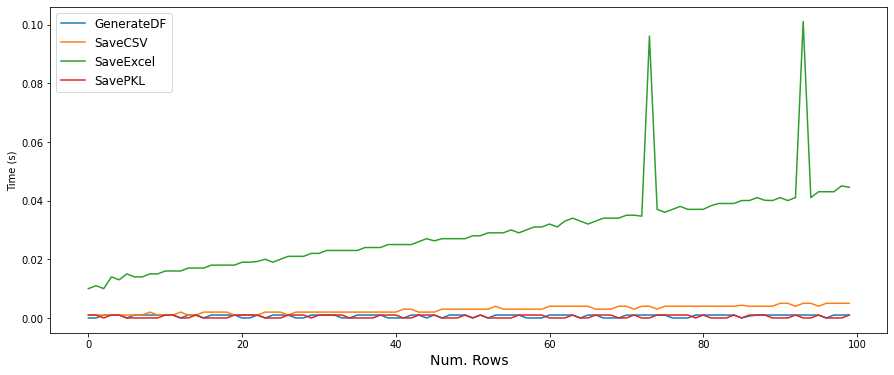

In [30]:
plt.figure(figsize=(15, 6))

for g, df_g in df_res_check.groupby("Label"):
    plt.plot(df_g["NumRows"], df_g["TimeDelta"], label=g)

plt.legend(fontsize=12)
plt.xlabel("Num. Rows", fontsize=14)
plt.ylabel("Time (s)")
plt.show()